# finding the patterns in the data

In [ ]:
import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/1.ushape.csv",header=None)
df

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [ ]:
# missing values
df.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [ ]:
df.dtypes

0    float64
1    float64
2    float64
dtype: object

In [ ]:
# duplicate values in the dataframme
df.duplicated().sum()  # no dulicate values from the data frame

0

In [ ]:
# identifying the X features target features
x = df.iloc[:,:2]
y = df.iloc[:,-1].astype(int)

In [ ]:
x.shape

(100, 2)

In [ ]:
x

,0,1
0,0.031595,0.986988
1,2.115098,-0.046244
2,0.882490,-0.075756
3,-0.055144,-0.037332
4,0.829545,-0.539321
...,...,...
95,1.699453,0.587720
96,0.218623,-0.652521
97,0.952914,-0.419766
98,-1.318500,0.423112


In [ ]:
y

0     0
1     1
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    0
99    0
Name: 2, Length: 100, dtype: int64

In [ ]:
def num_box(df):
  for i in df.columns:
    print("*"*10,i,"*"*10)

    # boxplot
    sns.boxplot(data=df,x=i)
    plt.title(f"boxplot of {i}")
    plt.show()

    # histogram
    print("*"*10,i,"*"*10)

    df[i].plot(kind="hist")
    plt.title(f"histogram of {i}")
    plt.show()
    # density plot
    print("*"*10,i,"*"*10)

    df[i].plot(kind="kde")
    plt.title(f"density plot of {i}")
    plt.show()



    des = df.describe().T
    print(des)

    skew_ =df.skew()
    print(skew_)

    mis_val =df[i].isnull().sum()
    print("mis_values",mis_val)





********** 0 **********


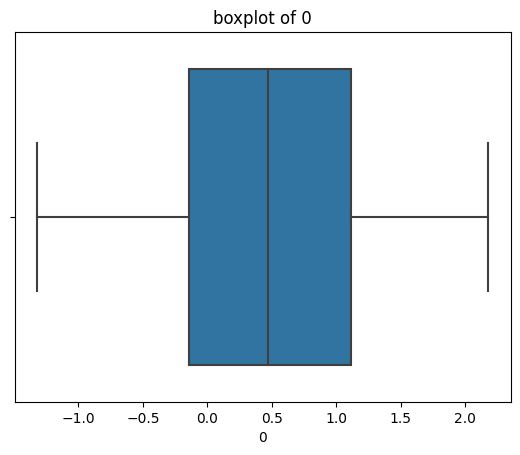

********** 0 **********


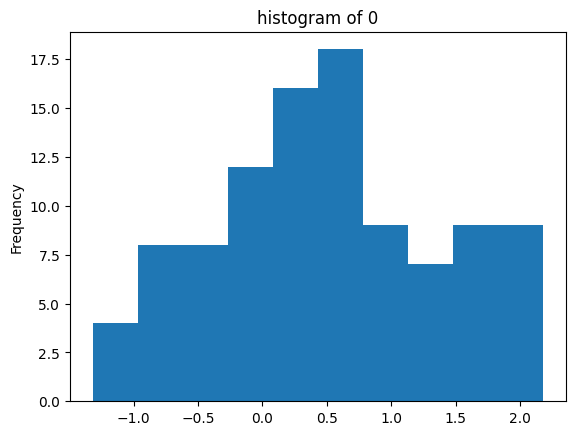

********** 0 **********


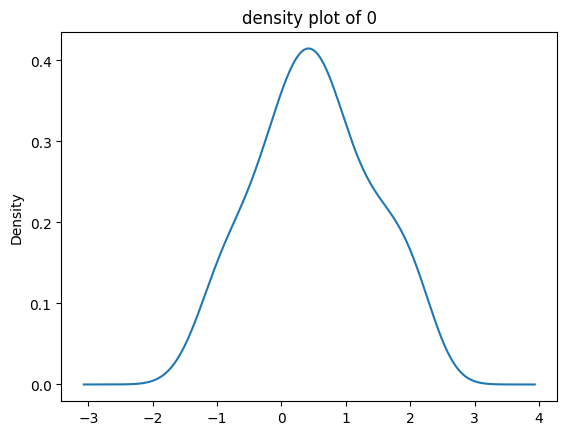

   count      mean       std       min      25%       50%       75%       max
0  100.0  0.500420  0.891044 -1.318500 -0.14033  0.470678  1.112008  2.181372
1  100.0  0.228701  0.592885 -1.035702 -0.20326  0.188660  0.658448  1.571899
0    0.048834
1    0.060033
dtype: float64
mis_values 0
********** 1 **********


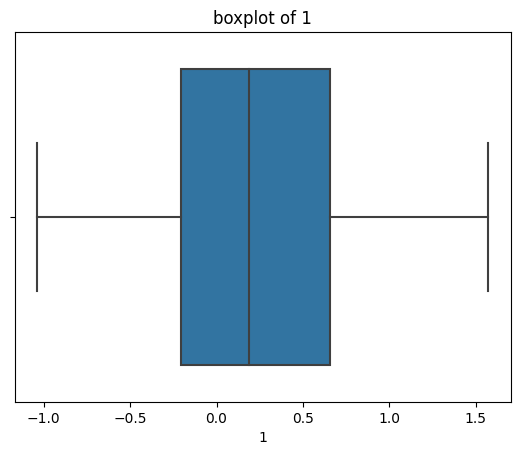

********** 1 **********


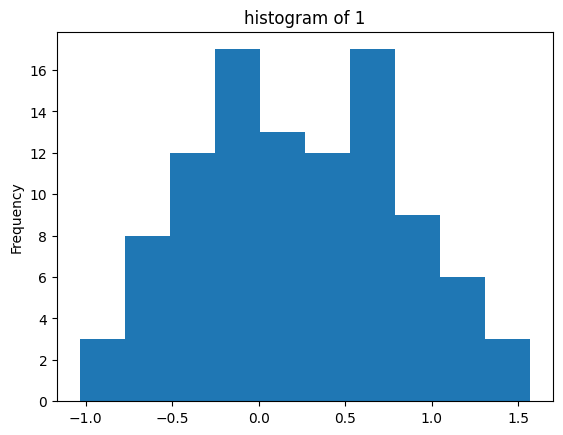

********** 1 **********


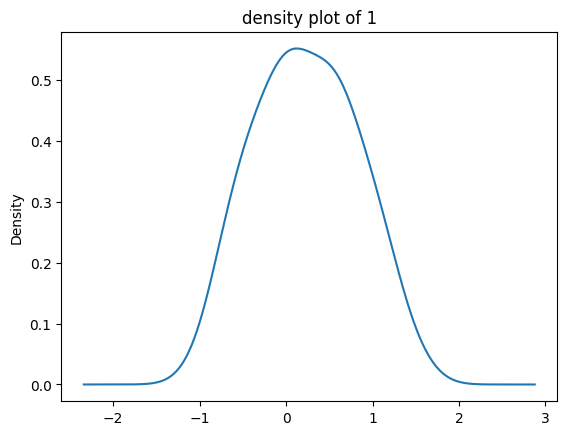

   count      mean       std       min      25%       50%       75%       max
0  100.0  0.500420  0.891044 -1.318500 -0.14033  0.470678  1.112008  2.181372
1  100.0  0.228701  0.592885 -1.035702 -0.20326  0.188660  0.658448  1.571899
0    0.048834
1    0.060033
dtype: float64
mis_values 0


In [ ]:
num_box(x)

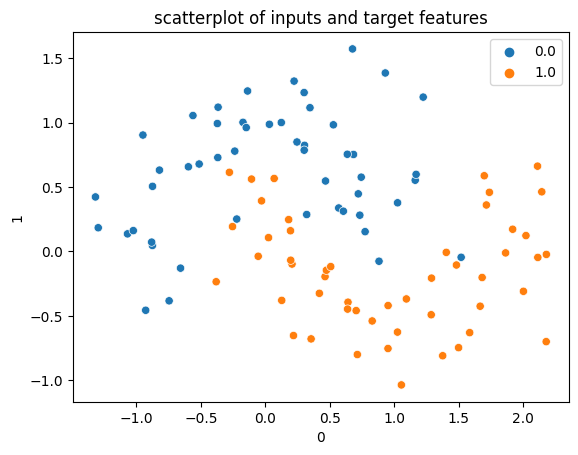

In [ ]:
sns.scatterplot(data=df,x=0,y=1,hue=2)
plt.title("scatterplot of inputs and target features")
plt.legend()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(90, 2) (90,)
(10, 2) (10,)


In [ ]:
x_train_tran  = pd.DataFrame(index=x_train.index)

In [ ]:
# trai and test data transformation
std=StandardScaler()
x_train_tran= pd.DataFrame(std.fit_transform(x_train),
                       columns=x_train.columns,
                       index=x_train.index)

In [ ]:
x_test_tran  = pd.DataFrame(index=x_test.index)

In [ ]:
x_test_tran= pd.DataFrame(std.transform(x_test),
                       columns=x_test.columns,
                       index=x_test.index)

In [ ]:
x_train_tran

,0,1
47,-0.963298,0.858786
96,-0.309025,-1.440275
8,-0.585047,0.299589
33,-0.085341,-0.894813
79,0.881564,-1.171514
...,...,...
4,0.371355,-1.251875
80,-0.705888,1.718337
36,-0.414268,1.311084
31,0.623719,-2.078008


In [ ]:
x_train

,0,1
47,-0.963298,0.858786
96,-0.309025,-1.440275
8,-0.585047,0.299589
33,-0.085341,-0.894813
79,0.881564,-1.171514
...,...,...
4,0.371355,-1.251875
80,-0.705888,1.718337
36,-0.414268,1.311084
31,0.623719,-2.078008


In [ ]:
model=Sequential()
model.add(Dense(8,activation="tanh",kernel_regularizer=L1(0.01),bias_regularizer=L1(0.01),input_dim=2))
model.add(Dense(4,activation="tanh",kernel_regularizer=L1(0.01),bias_regularizer=L1(0.01)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L1(0.01),bias_regularizer=L1(0.01)))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 24        
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 65 (260.00 Byte)
Trainable params: 65 (260.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.src.callbacks import History
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])
History=model.fit(x_train,y_train,batch_size=10,validation_split=0.1,epochs=15)

Epoch 1/15
9/9 [==============================] - 1s 30ms/step - loss: 0.9627 - accuracy: 0.4938 - val_loss: 0.7095 - val_accuracy: 0.8889
Epoch 2/15
9/9 [==============================] - 0s 8ms/step - loss: 0.7547 - accuracy: 0.7407 - val_loss: 0.6002 - val_accuracy: 1.0000
Epoch 3/15
9/9 [==============================] - 0s 6ms/step - loss: 0.6770 - accuracy: 0.8148 - val_loss: 0.5438 - val_accuracy: 1.0000
Epoch 4/15
9/9 [==============================] - 0s 6ms/step - loss: 0.6442 - accuracy: 0.8025 - val_loss: 0.5604 - val_accuracy: 0.8889
Epoch 5/15
9/9 [==============================] - 0s 6ms/step - loss: 0.6423 - accuracy: 0.8025 - val_loss: 0.5192 - val_accuracy: 0.8889
Epoch 6/15
9/9 [==============================] - 0s 6ms/step - loss: 0.6317 - accuracy: 0.8272 - val_loss: 0.4893 - val_accuracy: 0.8889
Epoch 7/15
9/9 [==============================] - 0s 8ms/step - loss: 0.6136 - accuracy: 0.8272 - val_loss: 0.4714 - val_accuracy: 0.8889
Epoch 8/15
9/9 [=================

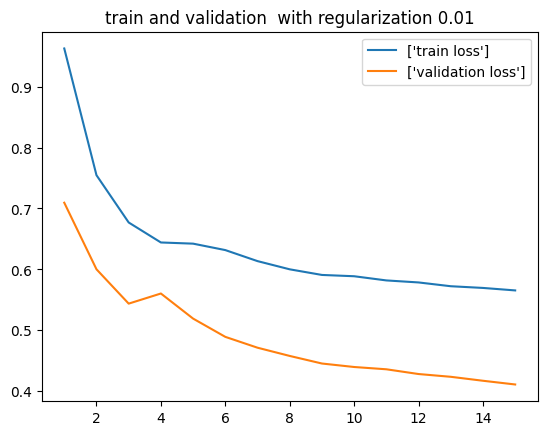

In [ ]:
plt.plot(range(1,16),History.history["loss"],label=["train loss"])
plt.plot(range(1,16),History.history["val_loss"],label=["validation loss"])
plt.title("train and validation  with regularization 0.01")
plt.legend()
plt.show()

In [ ]:
History.history["loss"]

[0.9627021551132202,
 0.7546567320823669,
 0.6770272254943848,
 0.6442050337791443,
 0.6422712802886963,
 0.6317046284675598,
 0.6136029362678528,
 0.6001271605491638,
 0.5908987522125244,
 0.5887633562088013,
 0.5818977952003479,
 0.5785877704620361,
 0.5723681449890137,
 0.5695669651031494,
 0.5654921531677246]

In [ ]:
# predictons of test data
pred_x_p =model.predict(x_test)

1/1 [==============================] - 0s 152ms/step


In [ ]:
pred_x_p

array([[0.87085754],
       [0.33523446],
       [0.2327652 ],
       [0.11402175],
       [0.87554324],
       [0.26058108],
       [0.48090702],
       [0.8596703 ],
       [0.5249624 ],
       [0.34959957]], dtype=float32)

In [ ]:
# converting the probabilities
predicted_v = np.where(pred_x_p>=0.5,1,0)

In [ ]:
predicted_v

array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0]])

In [ ]:
# evalution of test data
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,predicted_v))
print(classification_report(y_test,predicted_v))

0.9
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



# Handling the overfitting

In [ ]:
model=Sequential()
model.add(Dense(6,activation="relu",kernel_regularizer=L1(0.01),bias_regularizer=L1(0.01),input_dim=2))
model.add(Dense(5,activation="relu",kernel_regularizer=L1(0.01),bias_regularizer=L1(0.01)))

model.add(Dense(3,activation="relu",kernel_regularizer=L1(0.01),bias_regularizer=L1(0.01)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L1(0.01),bias_regularizer=L1(0.01)))

In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 6)                 18        
                                                                 
 dense_77 (Dense)            (None, 5)                 35        
                                                                 
 dense_78 (Dense)            (None, 3)                 18        
                                                                 
 dense_79 (Dense)            (None, 1)                 4         
                                                                 
Total params: 75 (300.00 Byte)
Trainable params: 75 (300.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.01),metrics=["accuracy"])
History=model.fit(x_train,y_train,batch_size=10,validation_split=0.1,epochs=20)

Epoch 1/20
9/9 [==============================] - 1s 34ms/step - loss: 0.9560 - accuracy: 0.6173 - val_loss: 0.9655 - val_accuracy: 0.4444
Epoch 2/20
9/9 [==============================] - 0s 6ms/step - loss: 0.9552 - accuracy: 0.5309 - val_loss: 0.9643 - val_accuracy: 0.4444
Epoch 3/20
9/9 [==============================] - 0s 5ms/step - loss: 0.9549 - accuracy: 0.5679 - val_loss: 0.9627 - val_accuracy: 0.3333
Epoch 4/20
9/9 [==============================] - 0s 6ms/step - loss: 0.9535 - accuracy: 0.6296 - val_loss: 0.9626 - val_accuracy: 0.4444
Epoch 5/20
9/9 [==============================] - 0s 8ms/step - loss: 0.9530 - accuracy: 0.5309 - val_loss: 0.9628 - val_accuracy: 0.4444
Epoch 6/20
9/9 [==============================] - 0s 6ms/step - loss: 0.9518 - accuracy: 0.5309 - val_loss: 0.9619 - val_accuracy: 0.4444
Epoch 7/20
9/9 [==============================] - 0s 6ms/step - loss: 0.9511 - accuracy: 0.5309 - val_loss: 0.9609 - val_accuracy: 0.4444
Epoch 8/20
9/9 [=================

In [ ]:
History.history["loss"]

[0.9560256600379944,
 0.9552227258682251,
 0.9548748731613159,
 0.953495442867279,
 0.95298832654953,
 0.9517541527748108,
 0.95109623670578,
 0.9500029683113098,
 0.9490795135498047,
 0.9481321573257446,
 0.9469872713088989,
 0.9458401799201965,
 0.944669246673584,
 0.9435900449752808,
 0.9427543878555298,
 0.9413343071937561,
 0.9399581551551819,
 0.9379671812057495,
 0.9359604716300964,
 0.9343771934509277]

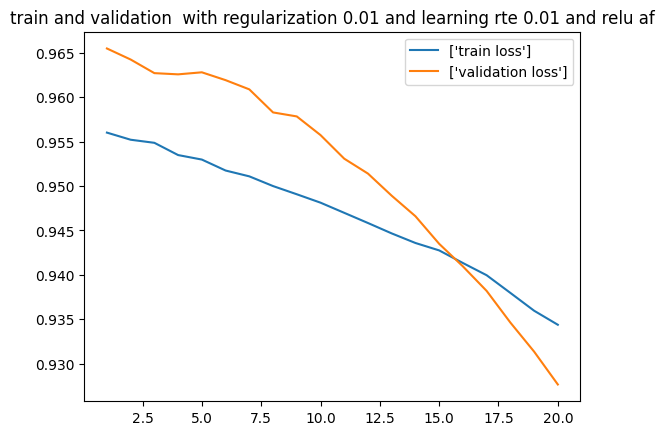

In [ ]:
plt.plot(range(1,21),History.history["loss"],label=["train loss"])
plt.plot(range(1,21),History.history["val_loss"],label=["validation loss"])
plt.title("train and validation  with regularization 0.01 and learning rte 0.01 and relu af")
plt.legend()
plt.show()

In [ ]:
# predictons of test data
pred_x_p =model.predict(x_test)

1/1 [==============================] - 0s 105ms/step


In [ ]:
predicted_v =np.where(pred_x_p>=0.5,1,0)

In [ ]:
predicted_v

array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,predicted_v))
print(classification_report(y_test,predicted_v))

0.8
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.60      1.00      0.75         3

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10



In [ ]:
model=Sequential()
model.add(Dense(6,activation="relu",kernel_regularizer=L1(0.02),bias_regularizer=L1(0.02),input_dim=2))
model.add(Dense(5,activation="relu",kernel_regularizer=L1(0.02),bias_regularizer=L1(0.02)))

model.add(Dense(3,activation="relu",kernel_regularizer=L1(0.02),bias_regularizer=L1(0.02)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L1(0.02),bias_regularizer=L1(0.02)))

In [ ]:

model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.01),metrics=["accuracy"])
History=model.fit(x_train,y_train,batch_size=10,validation_split=0.1,epochs=20)

Epoch 1/20
9/9 [==============================] - 1s 31ms/step - loss: 1.1971 - accuracy: 0.4691 - val_loss: 1.2225 - val_accuracy: 0.5556
Epoch 2/20
9/9 [==============================] - 0s 8ms/step - loss: 1.1873 - accuracy: 0.4568 - val_loss: 1.2103 - val_accuracy: 0.5556
Epoch 3/20
9/9 [==============================] - 0s 6ms/step - loss: 1.1785 - accuracy: 0.4568 - val_loss: 1.1989 - val_accuracy: 0.5556
Epoch 4/20
9/9 [==============================] - 0s 8ms/step - loss: 1.1704 - accuracy: 0.4568 - val_loss: 1.1889 - val_accuracy: 0.5556
Epoch 5/20
9/9 [==============================] - 0s 6ms/step - loss: 1.1628 - accuracy: 0.4568 - val_loss: 1.1761 - val_accuracy: 0.4444
Epoch 6/20
9/9 [==============================] - 0s 9ms/step - loss: 1.1528 - accuracy: 0.5309 - val_loss: 1.1671 - val_accuracy: 0.4444
Epoch 7/20
9/9 [==============================] - 0s 6ms/step - loss: 1.1463 - accuracy: 0.5432 - val_loss: 1.1588 - val_accuracy: 0.4444
Epoch 8/20
9/9 [=================

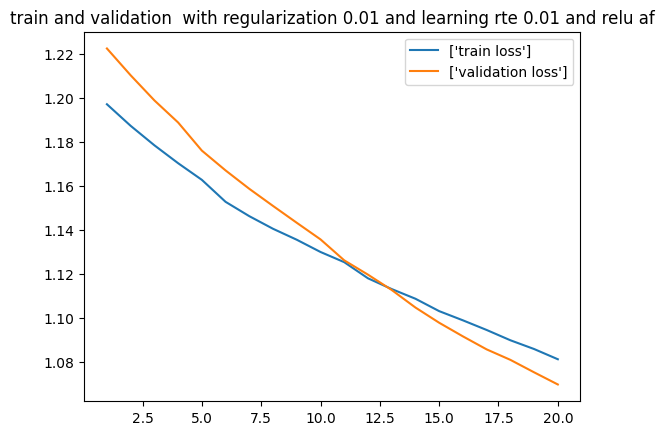

In [ ]:
plt.plot(range(1,21),History.history["loss"],label=["train loss"])
plt.plot(range(1,21),History.history["val_loss"],label=["validation loss"])
plt.title("train and validation  with regularization 0.01 and learning rte 0.01 and relu af")
plt.legend()
plt.show()

In [ ]:
# predictons of test data
pred_x_p =model.predict(x_test)

1/1 [==============================] - 0s 72ms/step


In [ ]:
pred_x_p

array([[0.5259231 ],
       [0.45098656],
       [0.44243485],
       [0.40832916],
       [0.5259231 ],
       [0.49022546],
       [0.5034904 ],
       [0.5191175 ],
       [0.48607597],
       [0.45127067]], dtype=float32)

In [ ]:
# converting the probabilities
predicted_v = np.where(pred_x_p>=0.5,1,0)

In [ ]:
predicted_v

array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0]])

In [ ]:
print(accuracy_score(y_test,predicted_v))
print(classification_report(y_test,predicted_v))

0.9
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



In [ ]:

#pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 20s 2ms/step


<Axes: >

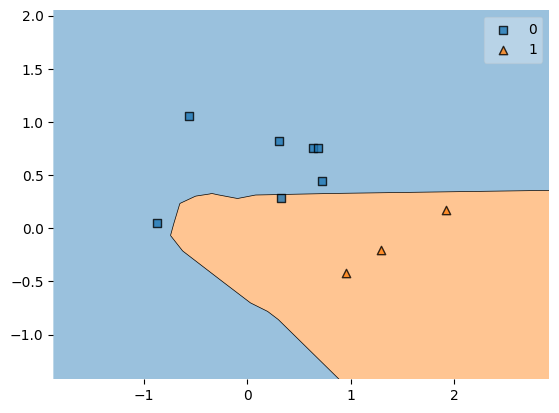

In [ ]:
plot_decision_regions(x_test.values,y_test.values,clf=model)


In [ ]:
x_test

,0,1
82,1.290037,-0.206914
60,0.636517,0.754448
17,0.304307,0.823739
81,-0.561753,1.054861
97,0.952914,-0.419766
42,-0.876156,0.046566
54,0.321185,0.286687
28,1.919806,0.172473
52,0.721552,0.447217
22,0.684511,0.752877
